In [3]:
##DATA PREPROCESSING##

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv(r'C:\Users\quodh\OneDrive\Documents\data-folder\Loan_default.csv')

# Drop ID column
df = df.drop(columns=['LoanID'])

# Encode categorical features
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Scale numerical features (excluding target 'Default')
num_cols = df.drop(columns=['Default']).select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = StandardScaler().fit_transform(df[num_cols])

# Final preprocessed data
print(df.head())


        Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
0  0.833990  0.089693   -1.086833    -0.341492        0.590533   
1  1.701221 -0.823021   -0.044309    -0.731666       -1.285731   
2  0.166888  0.043854    0.022715    -0.775718       -0.968209   
3 -0.767053 -1.303452   -1.168538     1.061875       -1.718715   
4  1.100830 -1.592855   -1.671921     0.369631       -1.487790   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0        1.341937      0.261771 -0.001526 -0.260753  -1.335708   
1       -1.343791     -1.308350  1.412793  0.778585   0.451884   
2        0.446694      1.156831 -0.708685 -0.823728   0.451884   
3        0.446694     -0.967805 -0.708685 -1.170174  -0.441912   
4        1.341937     -1.052188  0.705634  0.995114  -1.335708   

   EmploymentType  MaritalStatus  HasMortgage  HasDependents  LoanPurpose  \
0       -1.342541      -1.225315     0.999973       0.999464     1.415354   
1       -1.342541       0.000101    -1.000027      -

Shape: (255347, 17)

Target Distribution:
 Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64


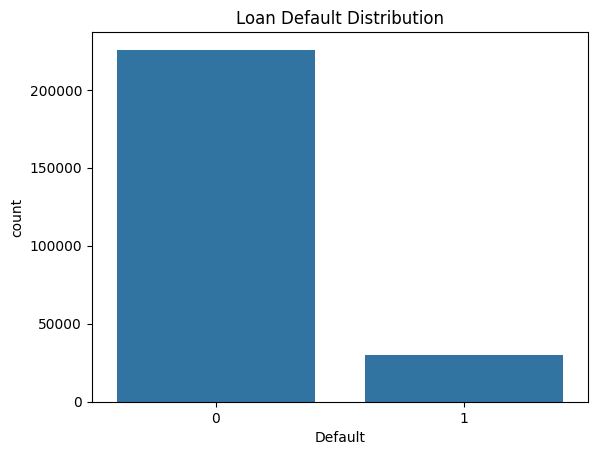

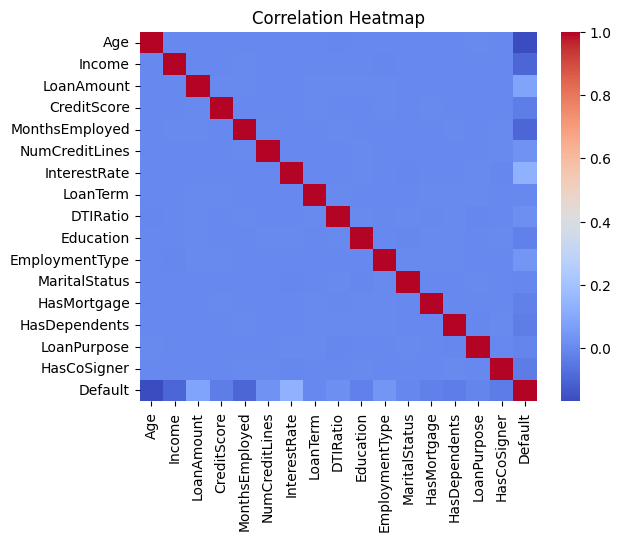

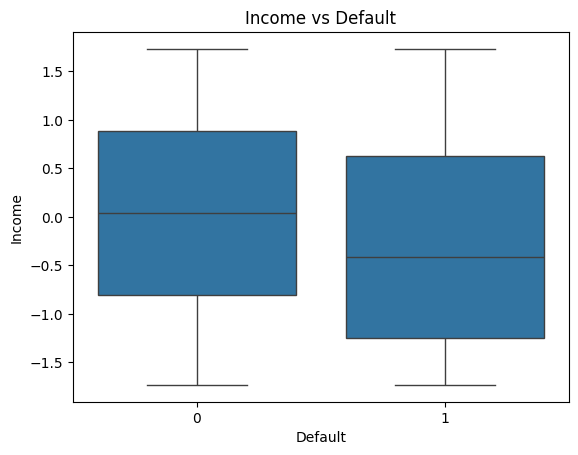

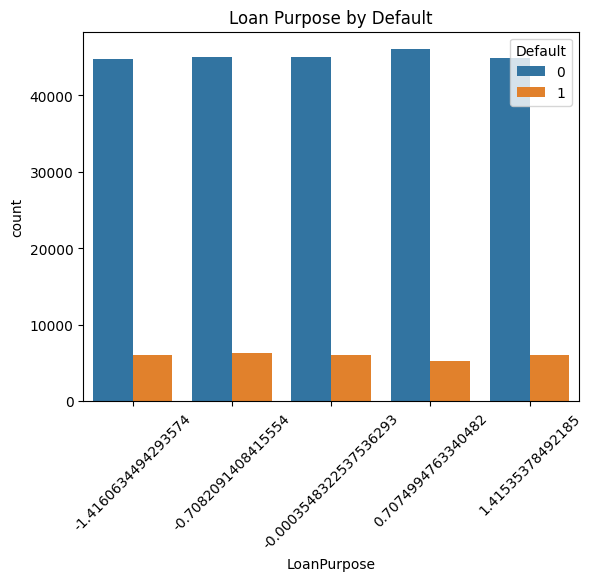

In [4]:
# EDA #

import seaborn as sns
import matplotlib.pyplot as plt

print("Shape:", df.shape)
print("\nTarget Distribution:\n", df['Default'].value_counts(normalize=True))

# Countplot: Default
sns.countplot(x='Default', data=df)
plt.title("Loan Default Distribution")
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Income vs Default (Boxplot)
sns.boxplot(x='Default', y='Income', data=df)
plt.title("Income vs Default")
plt.show()

# LoanPurpose vs Default
sns.countplot(x='LoanPurpose', hue='Default', data=df)
plt.title("Loan Purpose by Default")
plt.xticks(rotation=45)
plt.show()
